# Assignment 2: Statistical Modeling

## Project 1: Wind Power Forecast

### Introduction
In this project you will analyze a dataset from Tunø Knob wind power plant. Wind power is the response variable, with wind speed and wind direction as explanatory variables.

### Regression Models 

#### Load Data and transformation done in Assigment 1 for wind speed and wind Power.

(1) Wind-Power <- Box-cox.transformation()

(2) Wind-Speed <- log.transformation()

,r.day,month,day,pow.obs,ws30,wd30,wd_sin,wd_cos
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0.04860556,6.723611,4.0343405,-0.7787983,-0.62727441
2,2,1,2,0.55600274,4.272603,2.1365208,0.8442005,-0.53602757
3,3,1,3,0.42372329,4.272603,1.6240318,0.9985833,-0.05321032
4,4,1,4,0.33217534,6.541096,0.2269022,0.2249602,0.97436795
5,5,1,5,0.37455890,9.713699,5.3161852,-0.8231862,0.56777155
6,6,1,6,0.64245205,8.161644,0.9522963,0.8147491,0.57981370


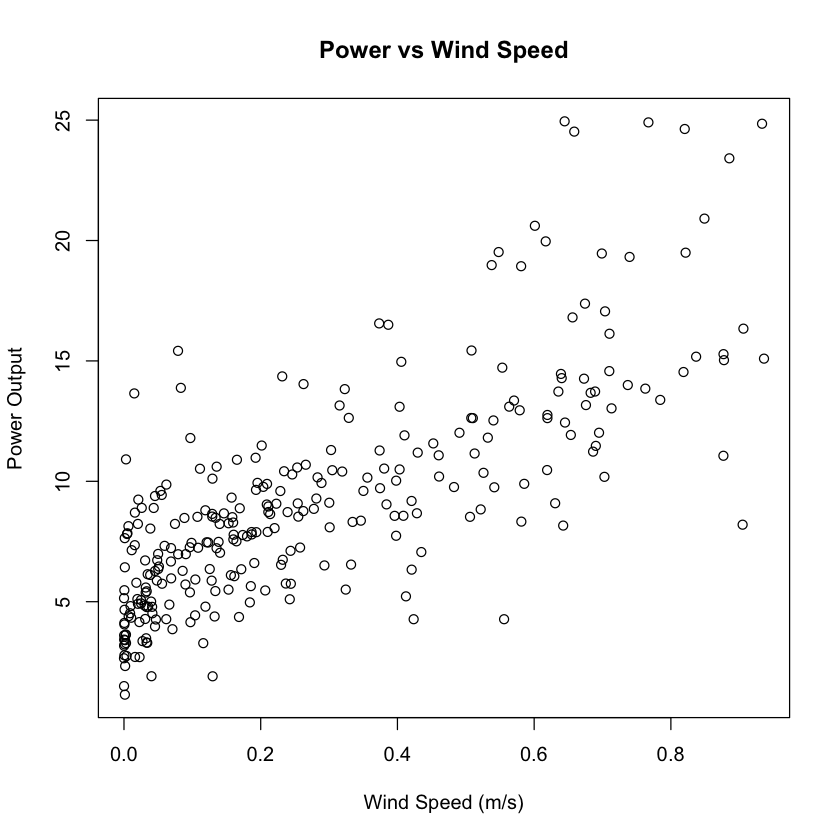

In [3]:
# Task 1.1: Formulate Initial Model
df_tuno <- read.table("data/tuno.txt", header = TRUE)
df_tuno$pow.obs <- df_tuno$pow.obs / 5000
# Transformation for wind power
box_cox_trans <- function(lambda, y){
  (1 / lambda) * log((y^lambda) / (1 - y^lambda))
}

### Transformation of Wind direction
df_tuno$wd_sin <- sin(df_tuno$wd30)
df_tuno$wd_cos <- cos(df_tuno$wd30)


# Defining variables for simplification
pow.obs <- df_tuno$pow.obs
ws30 <- df_tuno$ws30
wd_sin <- df_tuno$wd_sin
wd_cos <- df_tuno$wd_cos 
wd_rad <- df_tuno$wd_rad

# Power transformation from assigment 1
lambda.eq1 <- 0.326
boxpow <- box_cox_trans(lambda.eq1, pow.obs)

# Log transformation for wind speed
logws <- log(ws30)
par(bg = "white")
plot(pow.obs, ws30, main = "Power vs Wind Speed", xlab = "Wind Speed (m/s)", ylab = "Power Output")
head(df_tuno)

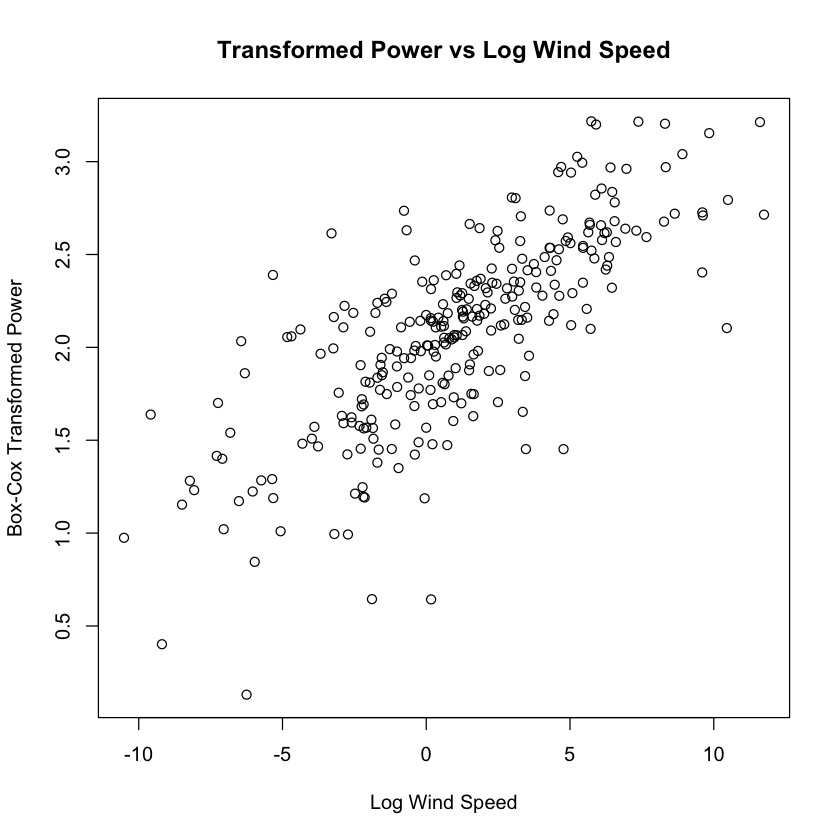

In [4]:
par(bg = "white")
plot(boxpow, logws, main = "Transformed Power vs Log Wind Speed", xlab = "Log Wind Speed", ylab = "Box-Cox Transformed Power")

### Base model

In [5]:
# Used later. For plotting
plot_model <- function(model, title = "Model Diagnostics") {

  width <- 6
  height <- 8
  par(bg = "white")
  options(repr.plot.width = width, repr.plot.height = height)
  print(summary(model))
  plot(model, which = 1, main = title)
}



Call:
lm(formula = pow.obs ~ ws30 + I(ws30^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47630 -0.10464 -0.02010  0.09463  0.65792 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1857444  0.0399230  -4.653 5.03e-06 ***
ws30         0.0581438  0.0074991   7.753 1.59e-13 ***
I(ws30^2)   -0.0006536  0.0003086  -2.118    0.035 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1648 on 285 degrees of freedom
Multiple R-squared:  0.5894,	Adjusted R-squared:  0.5866 
F-statistic: 204.6 on 2 and 285 DF,  p-value: < 2.2e-16



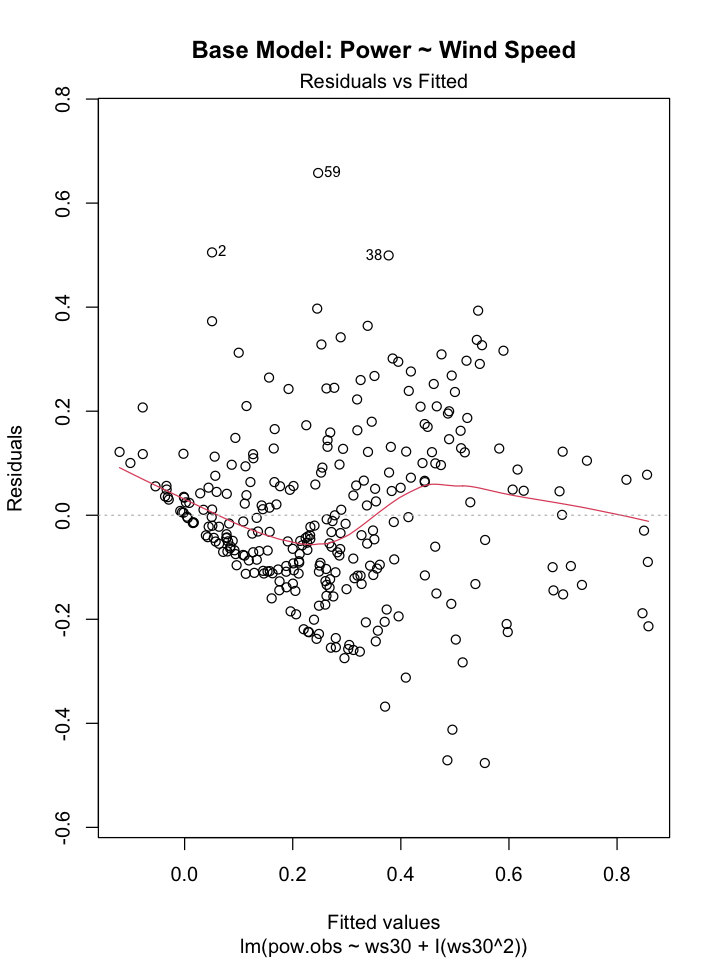

In [6]:
# Base model: pow.obs ~ ws30 + ws30^2
basemodel <- lm(pow.obs ~ ws30 + I(ws30^2))
plot_model(basemodel, "Base Model: Power ~ Wind Speed")

#### Question 1.2
You might consider non-normal models and/or normal model with data transformation. Further you might consider including wind direction. You should develop a suited model for prediction of daily power production.



Call:
lm(formula = boxpow ~ logws + I(logws^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1295 -1.2918  0.0097  1.5459  9.4840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.4715     1.4869  -5.025 8.91e-07 ***
logws         1.9162     1.5008   1.277  0.20272    
I(logws^2)    0.9964     0.3735   2.667  0.00808 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.605 on 285 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5779 
F-statistic: 197.5 on 2 and 285 DF,  p-value: < 2.2e-16



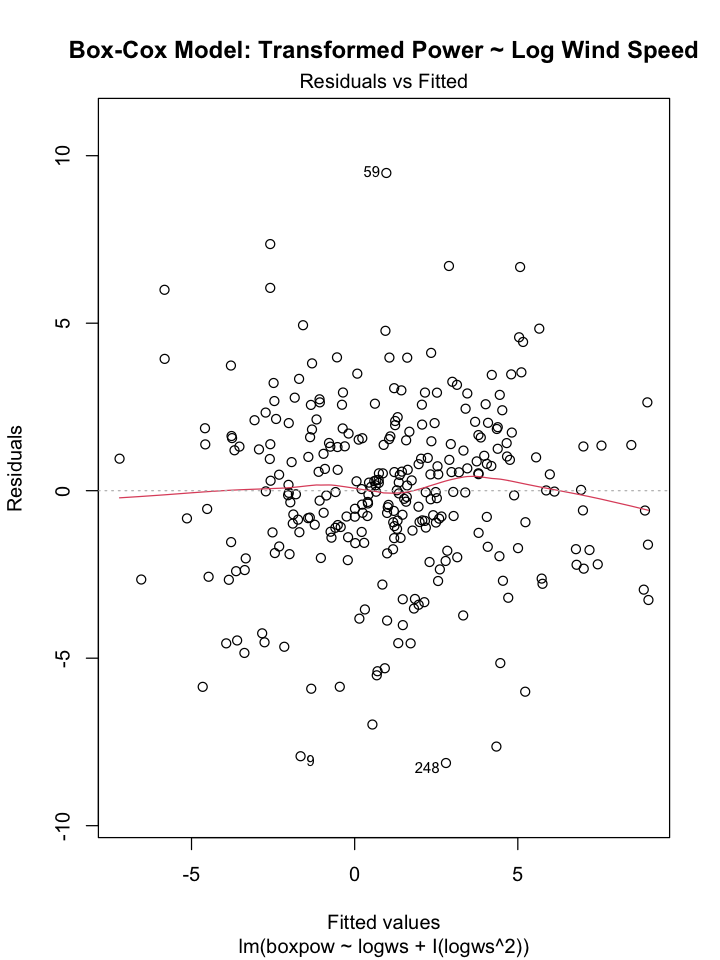

In [7]:
# Task 1.2: Model Development with Transformations
# Transformed model: boxpow ~ logws + logws^2
Box_cox_model <- lm(boxpow ~ logws + I(logws^2))
plot_model(Box_cox_model, "Box-Cox Model: Transformed Power ~ Log Wind Speed")


Call:
lm(formula = boxpow ~ logws + I(logws^2) + wd_sin + wd_cos)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4969 -1.3998  0.0207  1.5259  8.8118 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.2176     1.4727  -4.901 1.61e-06 ***
logws         1.6691     1.4911   1.119  0.26392    
I(logws^2)    1.0449     0.3741   2.793  0.00557 ** 
wd_sin       -0.1249     0.2344  -0.533  0.59474    
wd_cos       -0.7195     0.2219  -3.243  0.00132 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.565 on 283 degrees of freedom
Multiple R-squared:  0.5963,	Adjusted R-squared:  0.5906 
F-statistic: 104.5 on 4 and 283 DF,  p-value: < 2.2e-16



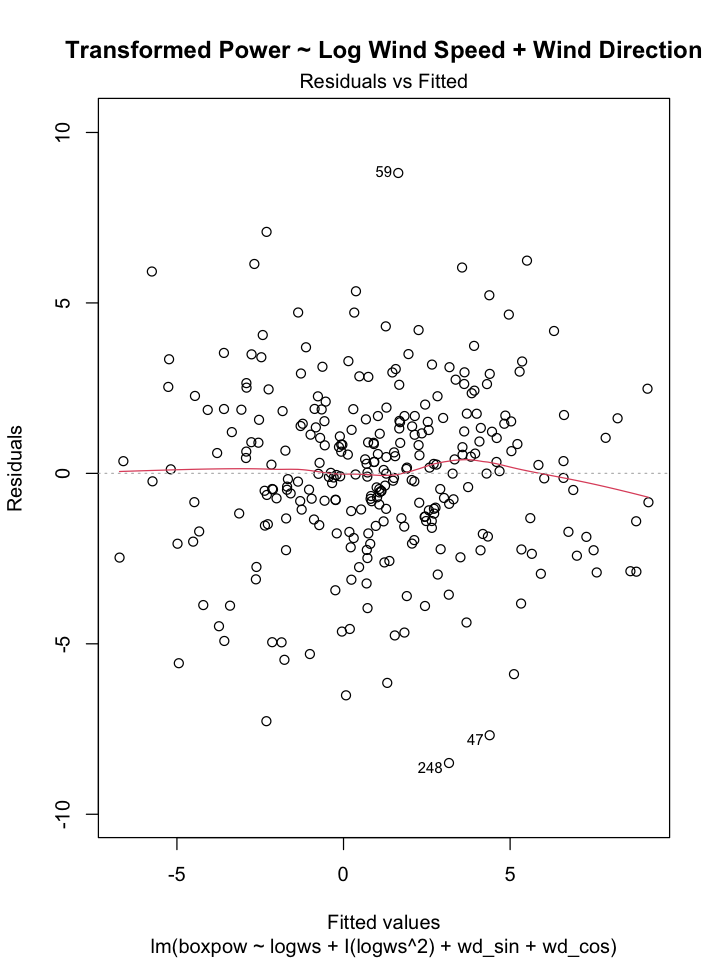

In [8]:
# Box-Cox model with wind direction
Box_cox_model_wd <- lm(boxpow ~ logws + I(logws^2) + wd_sin + wd_cos)
plot_model(Box_cox_model_wd, "Transformed Power ~ Log Wind Speed + Wind Direction")


Call:
glm(formula = pow.obs ~ ws30 + I(ws30^2), family = Gamma)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.110408   1.248912  12.900  < 2e-16 ***
ws30        -1.660988   0.174815  -9.501  < 2e-16 ***
I(ws30^2)    0.045300   0.005953   7.610 4.03e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.7071992)

    Null deviance: 503.32  on 287  degrees of freedom
Residual deviance: 354.24  on 285  degrees of freedom
AIC: -302.63

Number of Fisher Scoring iterations: 6



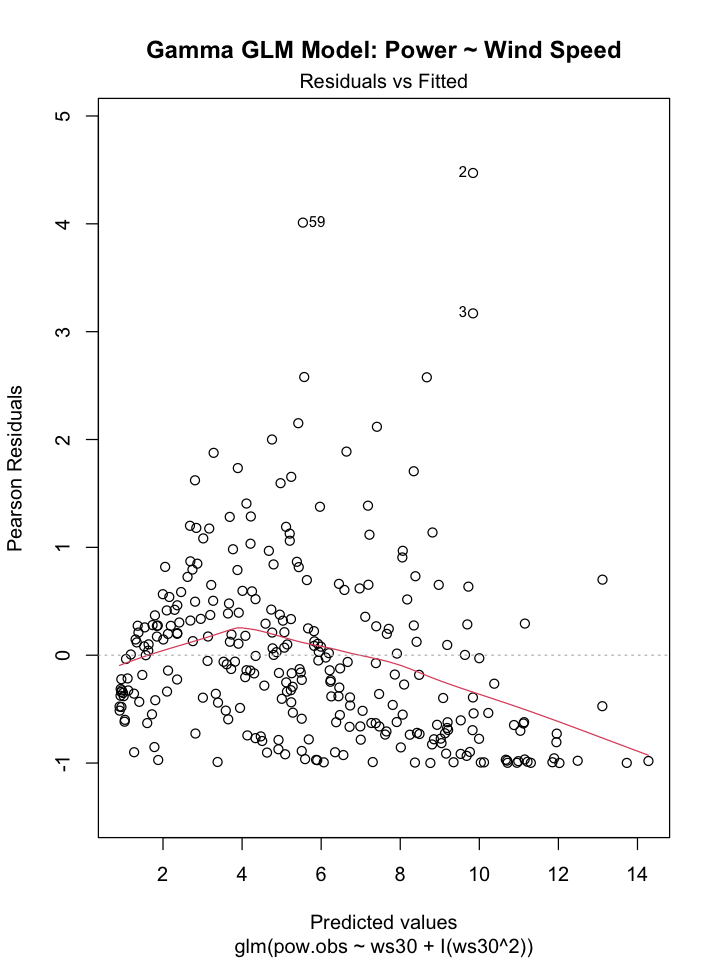

In [9]:
# Gamma Generalized Linear Model (GLM)
gamma_model <- glm(pow.obs ~ ws30 + I(ws30^2), family = Gamma)
plot_model(gamma_model, "Gamma GLM Model: Power ~ Wind Speed")

#### Question 1.3
Present the parameters of the final model, this include quantification of the uncertainty of the parameters.


In [10]:
# Extract coefficients and standard errors
beta <- coef(Box_cox_model_wd)
se <- summary(Box_cox_model_wd)$coefficients[, "Std. Error"]

# Calculate Lower and Upper bounds manually
lower <- beta - 1.96 * se
upper <- beta + 1.96 * se

# Display
cbind(Estimate = beta,SE = se, Lower = lower, Upper = upper)

,Estimate,SE,Lower,Upper
(Intercept),-7.2175676,1.4727052,-10.1040699,-4.3310654
logws,1.6690902,1.4910590,-1.2533854,4.5915659
I(logws^2),1.0449191,0.3740760,0.3117301,1.7781081
wd_sin,-0.1248611,0.2344439,-0.5843711,0.3346489
wd_cos,-0.7194732,0.2218587,-1.1543162,-0.2846302


#### Question 1.4
Give an interpretation of the parameters in particular this should include presentation of any nonlinear functions (series expansions) of the explanatory variables.


#### Question 1.5
Present the final model, e.g. some graphical presentation of predictions under different scenarios of wind speed and wind direction.


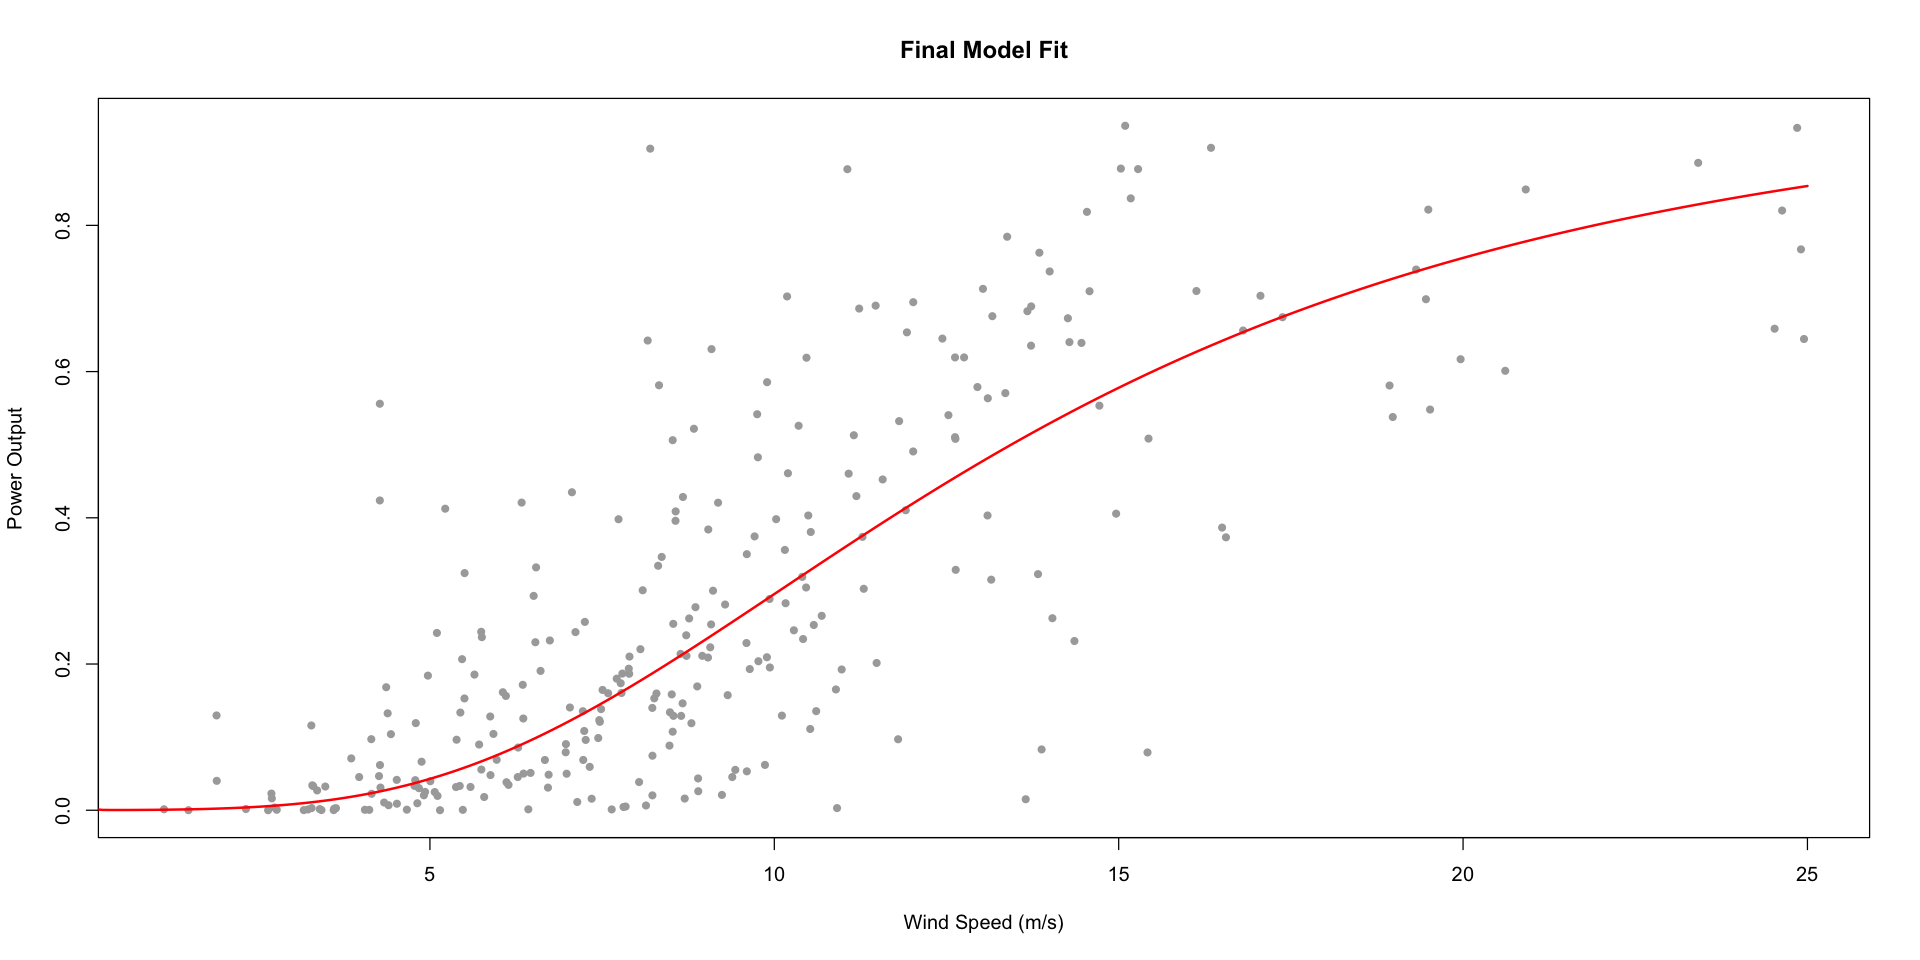

In [11]:
# 1. Setup
lambda <- 0.326 

# 2. Plot the raw data
par(bg = "white") 
width <- 16
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
plot(df_tuno$ws30, df_tuno$pow.obs, 
     pch = 16, cex = 0.9, col = "darkgrey",
     xlab = "Wind Speed (m/s)", 
     ylab = "Power Output", 
     main = "Final Model Fit")

# 3. Create prediction sequence
ws_seq <- seq(0, 25, length.out = 200)

# Keep cos and sin konstant at their mean value 
new_data <- data.frame(
  logws = log(ifelse(ws_seq == 0, 1e-4, ws_seq)), 
  wd_sin = mean(df_tuno$wd_sin),
  wd_cos = mean(df_tuno$wd_cos)
)

# 4. Predict and Back-Transform (Using the LOGIT-POWER Inverse)
# Step A: Get the model prediction (z)
z <- predict(Box_cox_model_wd, newdata = new_data)

# Step B: Apply the specific inverse formula for your transformation
# inverse formula USING SYMPY CHECK INVERSE.IPYNB
y_pred <- (exp(lambda * z) / (1 + exp(lambda * z)))^(1/lambda)

# Plot the line
lines(ws_seq, y_pred, col = "red", lwd = 2)